# Create FewShot Dataset for German Endangerd Birds

The birds should include the ["Windkraftsensiblen Arten"](https://raphaelschwinger.notion.site/Zielvogelarten-Brutvogelarten-der-UMK-Liste-1-b137cb376dde4d28a27a903fd6e291b9?pvs=4)

and the endangered birds accourding to the ["Rote Liste des Nabu"](https://raphaelschwinger.notion.site/Rote-Liste-der-Brutv-gel-e706db57abcb4e76b0ce64410b422172?pvs=4).

In [15]:
# switch to parent directory
import os
os.chdir("../")

In [17]:
# get current working directory
cwd = os.getcwd()
print(cwd)

/workspaces/GADME


1. Download Metadata from XenoCanto

In [2]:
from huggingface_hub import hf_hub_download

metadata_file = hf_hub_download(repo_id="DBD-research-group/gadme_v1", filename="metadata.parquet", repo_type="dataset", subfolder='data/xenocanto', revision="data", cache_dir="data/xenocanto")

/root/.cache/pypoetry/virtualenvs/gadme-zu58s5te-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load metadata in pandas dataframe
import pandas as pd
metadata = pd.read_parquet(metadata_file)


In [4]:
# print basic statistic

# number of samples
print("Number of samples: {}".format(len(metadata)))

# Different species
print("Number of different species: {}".format(len(metadata['ebird_code'].unique())))

# Ebird_code with the most samples
print("Ebird_code with the most samples: {}".format(metadata['ebird_code'].value_counts().idxmax()))
# print number of samples for ebird_code with the most samples
print("Number of samples for ebird_code with the most samples: {}".format(metadata['ebird_code'].value_counts().max()))

X = 10
# Print number of ebird_codes with less then X samples
print("Number of ebird_codes with less then 10 samples: {}".format(len(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() < 10])))

# Print ebird_codes with less then X samples
print("Ebird_codes with less then 10 samples: {}".format(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() < 10]))


Number of samples: 686593
Number of different species: 10124
Ebird_code with the most samples: gretit1
Number of samples for ebird_code with the most samples: 6811
Number of ebird_codes with less then 10 samples: 2781
Ebird_codes with less then 10 samples: ebird_code
baswar1    9
gopwea1    9
bcswea1    9
kamwea1    9
whnmyn1    9
          ..
pershe1    1
hutshe1    1
whbmin2    1
lython1    1
jamspi     1
Name: count, Length: 2781, dtype: int64


In [7]:
# the number of ebird_codes that have x samples
Y = [len(metadata['ebird_code'].value_counts()[metadata['ebird_code'].value_counts() == x]) for x in range(1, metadata['ebird_code'].value_counts().max()+1)]

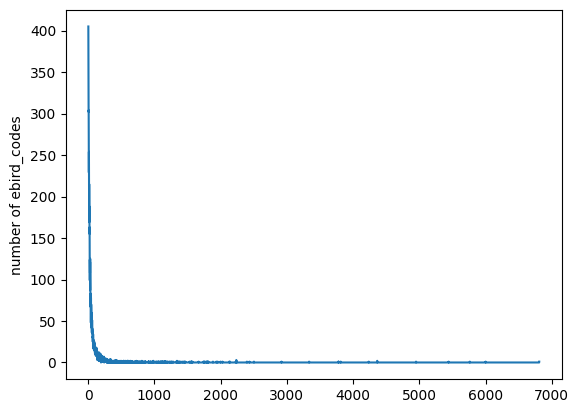

In [8]:
# plot where x achis is goes from 1 to the number of samples of the ebird_code that has the most samples and where the y achis showes the number of ebird_codes that have at least x samples
import matplotlib.pyplot as plt
plt.plot(range(1, metadata['ebird_code'].value_counts().max()+1), Y)
plt.ylabel('number of ebird_codes')
plt.show()

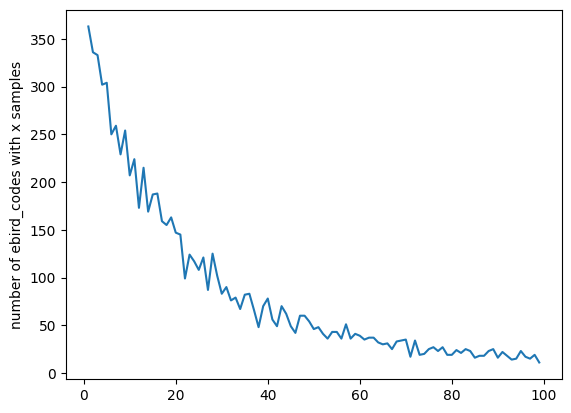

In [13]:
plt.plot(range(1, 100), Y[1:100])
plt.ylabel('number of ebird_codes with x samples')
plt.show()

In [30]:
# read rote_liste csv file in pandas dataframe
rote_liste = pd.read_csv("./dataset/German-endangerd-birds/rote_liste.csv", sep=",")
umk_liste = pd.read_csv("./dataset/German-endangerd-birds/umk_liste.csv", sep=",")
# rename eBird Code to ebird_code
rote_liste = rote_liste.rename(columns={'eBird Code': 'ebird_code'}, inplace=True)
umk_liste = umk_liste.rename(columns={'eBird Code': 'ebird_code'}, inplace=True)

# remove rows with NaN values
rote_liste = rote_liste.dropna()
umk_liste = umk_liste.dropna()

# set ebird_code as index
rote_liste = rote_liste.set_index('ebird_code')
umk_liste = umk_liste.set_index('ebird_code')

# combime both dataframes to one dataframe and add a "reason" column with the value "rote_liste" or "umk_liste"
rote_liste['reason'] = "rote_liste"
umk_liste['reason'] = "umk_liste"
german_endangered_birds = pd.concat([rote_liste, umk_liste])


AttributeError: 'NoneType' object has no attribute 'set_index'

In [25]:
# select samples from metadata that are in rote_liste, match on ebird_code
german_endangered_birds_metadata = metadata[metadata['ebird_code'].isin(rote_liste['eBirdCode'])]

In [ ]:
# basic statistic

